In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATADIR = '../data'
game_id = 1
events = mio.read_event_data(DATADIR,game_id)
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')
events = mio.to_metric_coordinates(events)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away


In [3]:
shots = events[events['Type']=='SHOT']
all_goals = shots[shots['Subtype'].str.contains('-GOAL')]

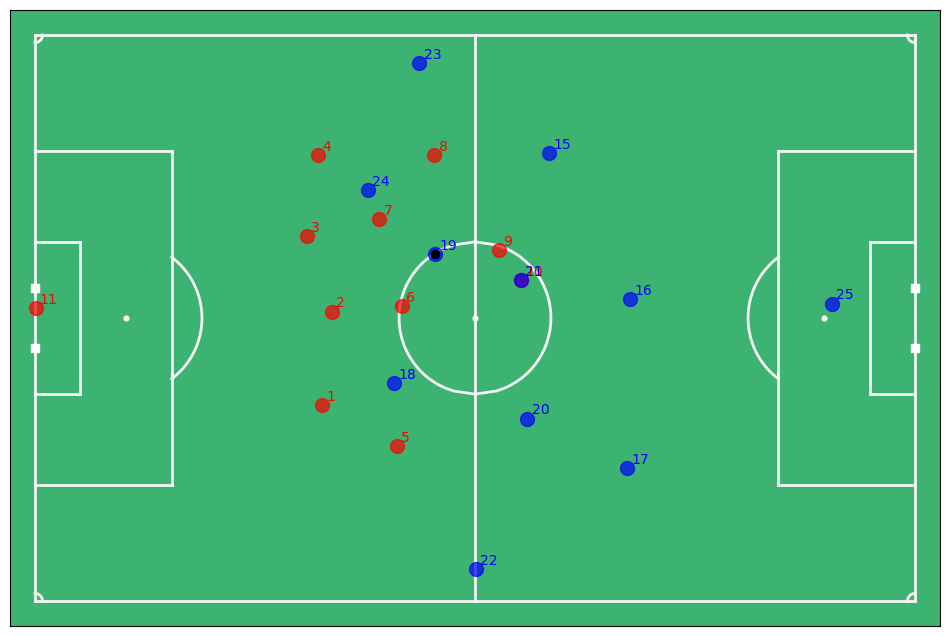

In [4]:
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame], annotate=True )
plt.savefig("start_positions.jpg")

In [5]:
all_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
34,Home,SHOT,HEAD-ON TARGET-GOAL,1,2289,91.56,2309,92.36,Player9,NaN,44.52,2.04,54.06,-3.40
1114,Home,SHOT,ON TARGET-GOAL,2,90005,3600.20,90026,3601.04,Player10,NaN,-44.52,12.92,-53.00,-2.72
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,-50.88,-2.72,-54.06,-0.68


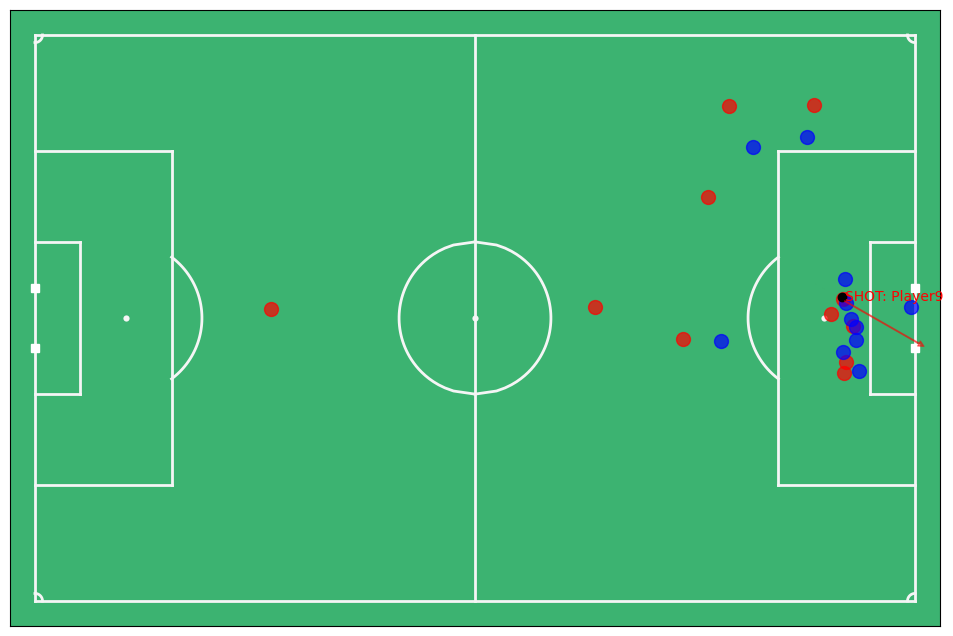

In [6]:
# First Goal
fig,ax = mviz.plot_events( events.loc[34:34], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[34]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )
plt.savefig("goal_1.jpg")

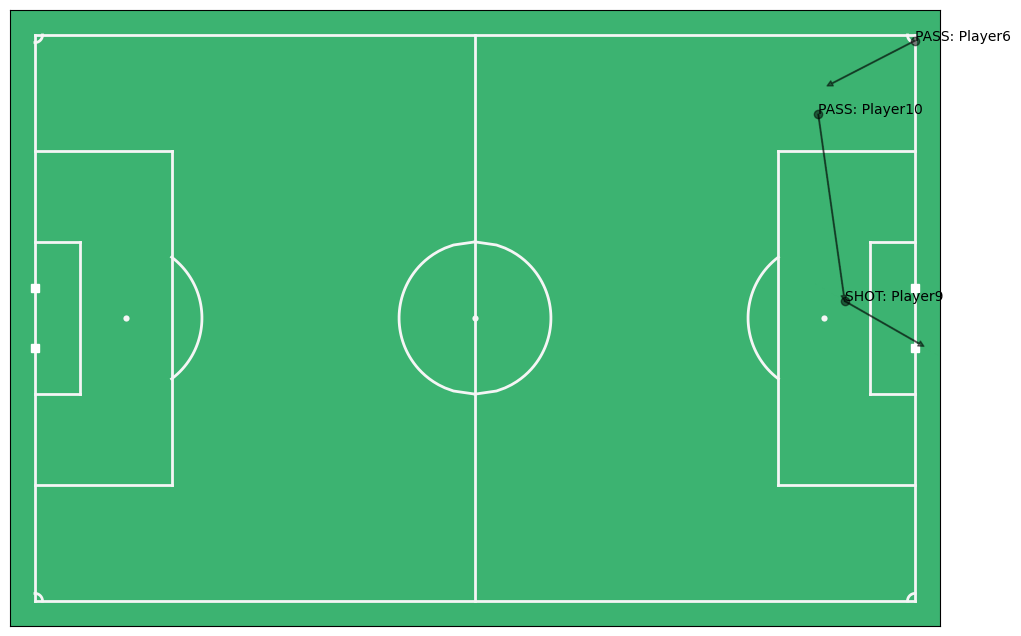

In [8]:
# Passes leading to goal 1
mviz.plot_events(
    events.loc[32:34], color="k", indicators=["Marker", "Arrow"], annotate=True
)
plt.savefig("goal_1_passes.jpg")

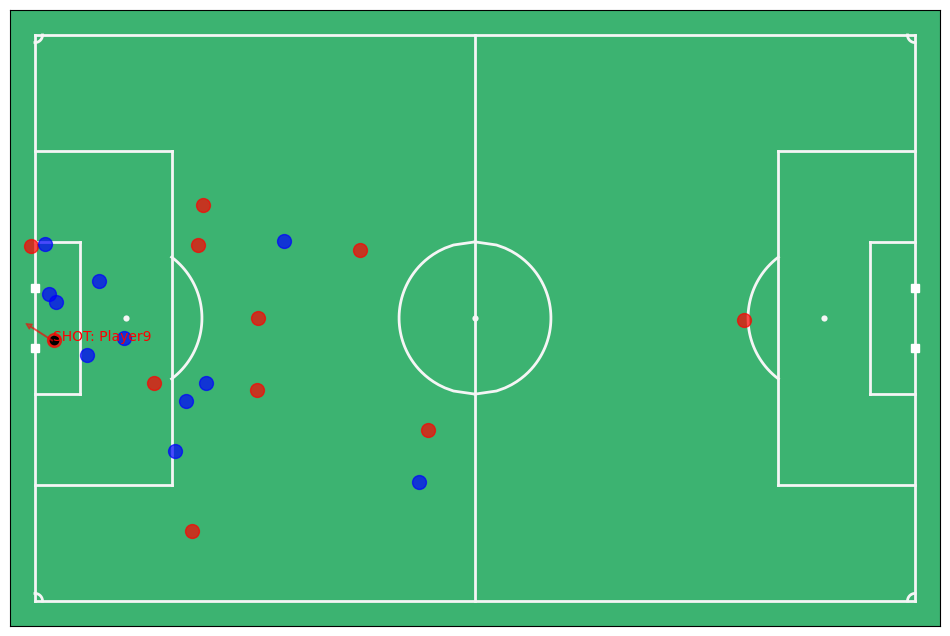

In [7]:
# Second Goal
fig,ax = mviz.plot_events( events.loc[1213:1213], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1213]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )
plt.savefig("goal_2.jpg")

In [9]:
events.loc[1205:1213]
# No passes leading up to goal # 2

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1205,Away,BALL LOST,NaN,2,98800,3952.00,98861,3954.44,Player25,NaN,-53.00,4.08,-43.46,-10.88
1206,Home,RECOVERY,NaN,2,98860,3954.40,98860,3954.40,Player8,NaN,-42.40,-11.56,NaN,NaN
1207,Home,PASS,NaN,2,98931,3957.24,98958,3958.32,Player8,Player4,-34.98,-12.92,-33.92,-19.04
1208,Home,PASS,CROSS,2,98958,3958.32,99005,3960.20,Player4,Player5,-33.92,-19.04,-48.76,9.52
1209,Home,SHOT,ON TARGET-SAVED,2,99005,3960.20,99014,3960.56,Player5,NaN,-48.76,9.52,-53.00,3.40
1210,Away,RECOVERY,SAVED,2,99012,3960.48,99012,3960.48,Player25,NaN,-50.88,1.36,NaN,NaN
1211,Away,BALL LOST,WOODWORK,2,99012,3960.48,99014,3960.56,Player25,NaN,-50.88,1.36,-53.00,3.40
1212,Home,RECOVERY,NaN,2,99032,3961.28,99032,3961.28,Player9,NaN,-50.88,-2.72,NaN,NaN
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,-50.88,-2.72,-54.06,-0.68


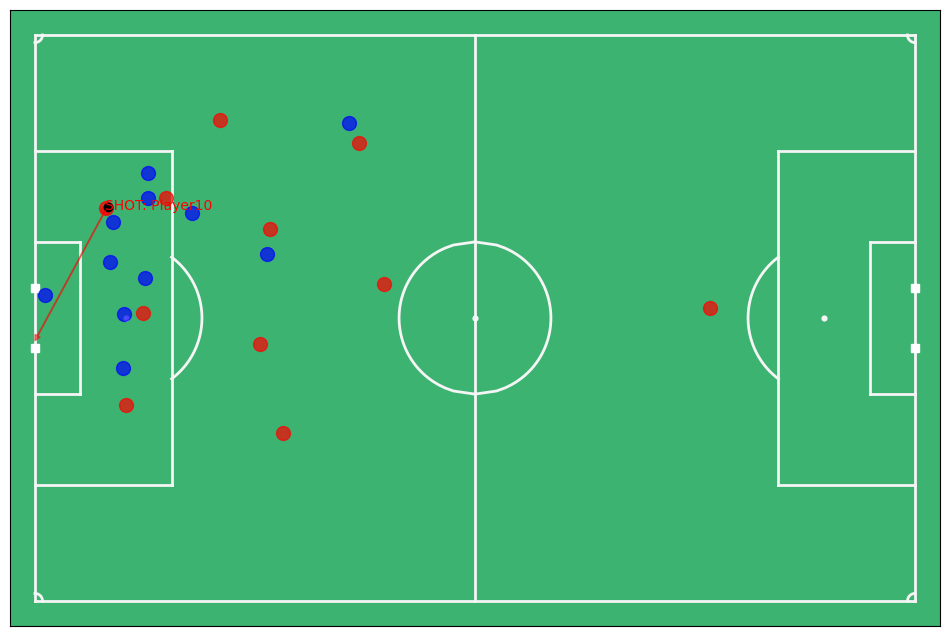

In [10]:
# Third Goal
fig,ax = mviz.plot_events( events.loc[1114:1114], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1114]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )
plt.savefig("goal_3.jpg")

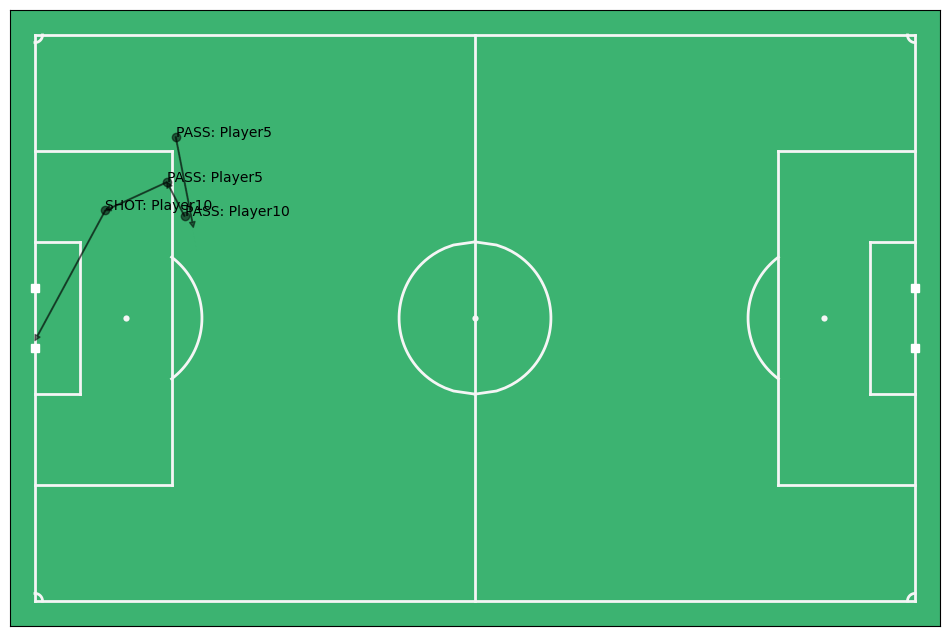

In [11]:
mviz.plot_events(
    events.loc[1111:1114], color="k", indicators=["Marker", "Arrow"], annotate=True
)
plt.savefig("goal_3_passes.jpg")

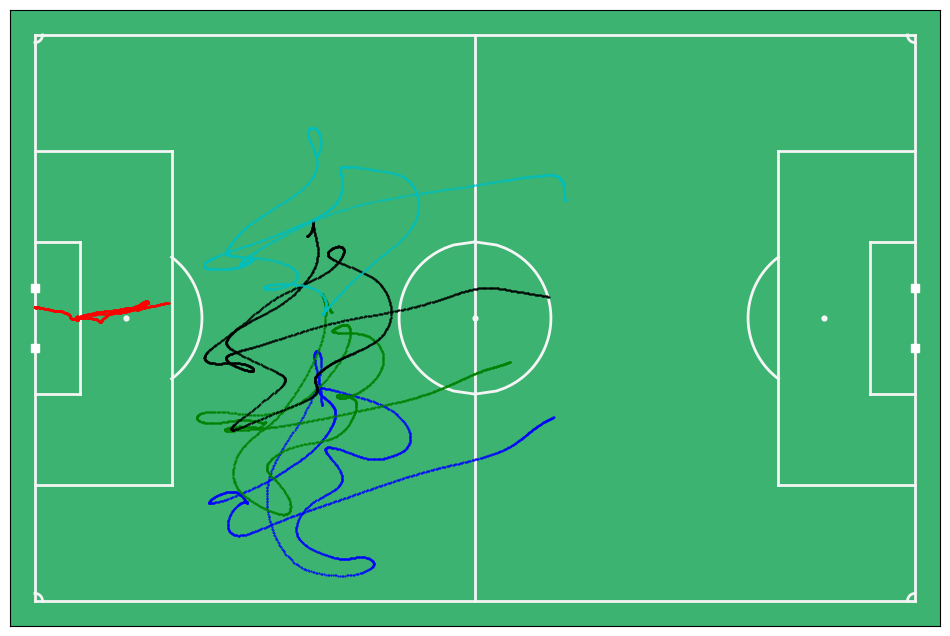

In [12]:
# Movement of select players
fig, ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', markersize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', markersize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', markersize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', markersize=1)
plt.savefig("player_movements.jpg")

In [13]:
# Video of goals found at 
# data/home_goal_1.mp4
# data/home_goal_2.mp4
# data/home_goal_3.mp4

In [13]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True)
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True)

avg_speeds = {}
for i in range(1, 15):
    col = f'Home_{i}_speed'
    speed = tracking_home[col].mean()
    avg_speeds[f'Player{i}'] = speed
speed_df = pd.DataFrame(avg_speeds.items(), columns=['Player', 'Average Speed'])
speed_df
plt.savefig('player_speed.jpg')

<Figure size 640x480 with 0 Axes>

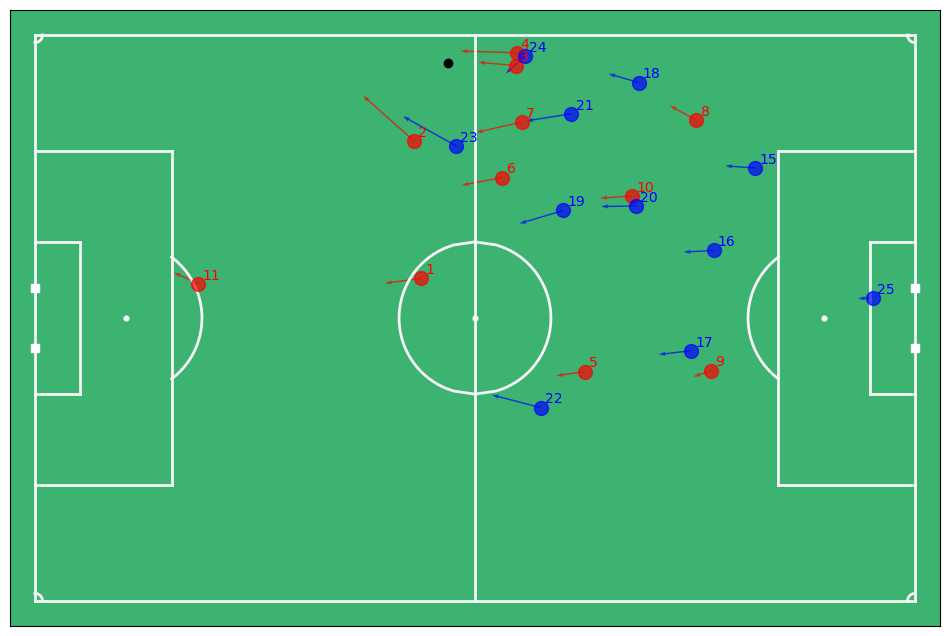

In [14]:
mviz.plot_frame( tracking_home.loc[15000], tracking_away.loc[15000], include_player_velocities=True, annotate=True)
plt.savefig('player_velocity.png')

In [15]:
# Create a Physical summary dataframe for home players
# Starts off empty except for jersey number 
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players)

In [16]:
# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    player_minutes = ( tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60. # convert to minutes
    minutes.append( player_minutes )
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)

In [17]:
# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

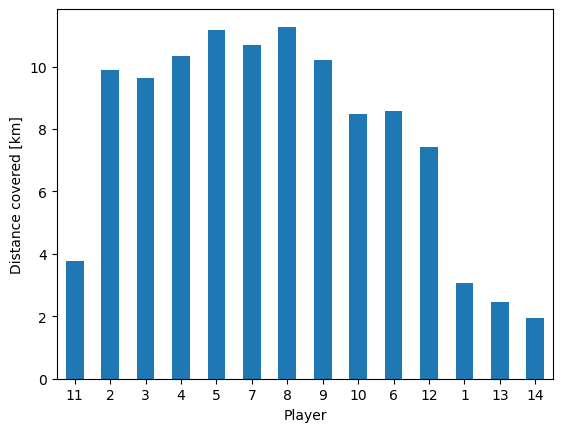

In [19]:
# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')
plt.savefig('player_distance.jpg')

In [20]:
# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2 m/s)
    player_distance = tracking_home.loc[tracking_home[column] < 2, column].sum()/25./1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    jogging.append( player_distance )
    # running (between 4 and 7 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 4) & (tracking_home[column] < 7), column].sum()/25./1000
    running.append( player_distance )
    # sprinting (greater than 7 m/s)
    player_distance = tracking_home.loc[ tracking_home[column] >= 7, column].sum()/25./1000
    sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

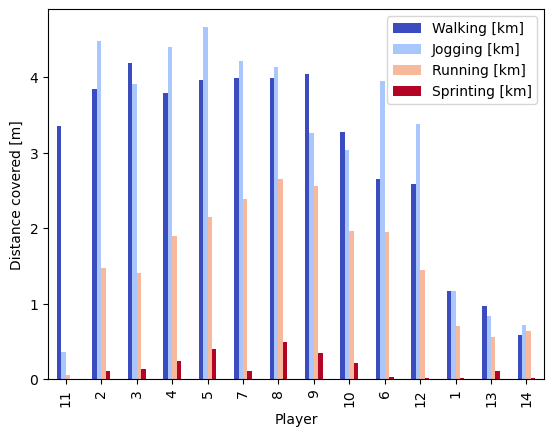

In [22]:
# make a clustered bar chart of distance covered for each player at each speed
ax = home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')
plt.savefig('player_walkjogrun.jpg')

In [23]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1*25 # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
    nsprints.append( np.sum( player_sprints == 1 ) )
home_summary['# sprints'] = nsprints

In [24]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],# sprints
11,96.670667,3.769460,3.355026,0.354992,0.055934,0.003508,0
2,96.670667,9.906317,3.838077,4.483971,1.476983,0.107286,6
3,96.670667,9.638555,4.189059,3.915209,1.406503,0.127783,7
4,96.670667,10.331770,3.789466,4.407478,1.900015,0.234811,13
5,96.670667,11.171473,3.957935,4.666406,2.144064,0.403068,19
7,96.670667,10.701948,3.991223,4.213230,2.390009,0.107486,6
8,96.670667,11.279470,3.987912,4.141924,2.653528,0.496106,20
9,96.670667,10.208639,4.048677,3.264450,2.555405,0.340108,15
10,80.928000,8.486175,3.279598,3.032404,1.957172,0.217001,11
6,73.899333,8.579794,2.647438,3.955789,1.945064,0.031503,2


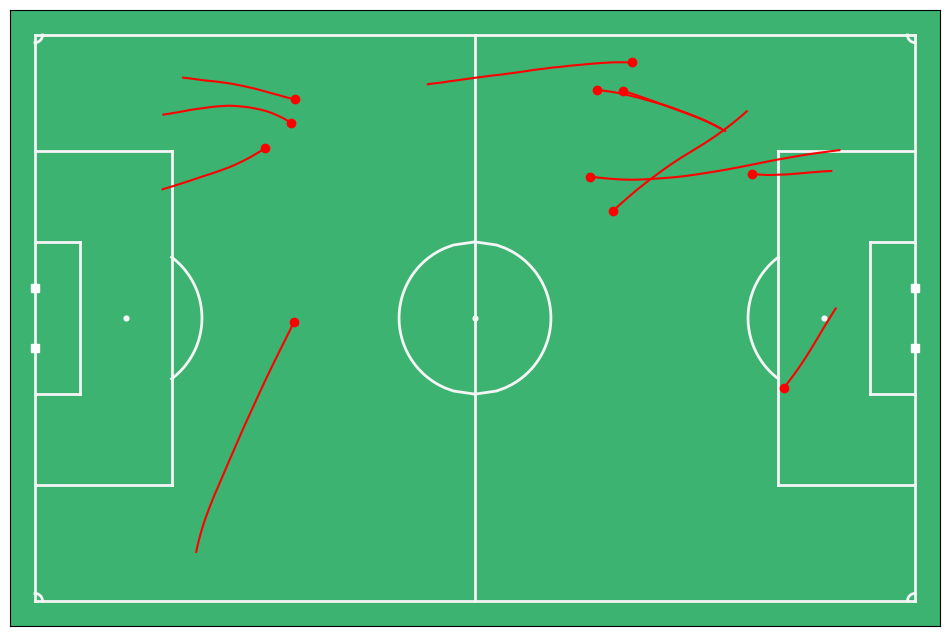

In [25]:
# Plot the trajectories for each of player 10's sprints
player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1
# now plot all the sprints
fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s],tracking_home[column_y].iloc[s],'ro')
    ax.plot(tracking_home[column_x].iloc[s:e+1],tracking_home[column_y].iloc[s:e+1],'r')
plt.savefig('player_10_sprints.jpg')

In [26]:
max_speeds = {}
for i in range(1, 15):
    col = f'Home_{i}_speed'
    speed = tracking_home[col].max()
    max_speeds[f'Player{i}'] = speed
max_speed_df = pd.DataFrame(max_speeds.items(), columns=['Player', 'Max Speed'])
max_speed_df

,Player,Max Speed
0,Player1,7.303434
1,Player2,10.277240
2,Player3,11.206844
3,Player4,9.395681
4,Player5,11.189671
5,Player6,7.410571
6,Player7,9.164668
7,Player8,10.613069
8,Player9,9.907138
9,Player10,10.075053


In [27]:
# Usain Bolt’s world record top speed of 27.78mph (12.4187712 mps) remains unmatched
# The fastest players are 21 mph - 22.69 mph (9.38784 mps - 10.1433376 mps)
# (see https://authoritysoccer.com/15-fastest-soccer-players-in-the-world-ranked-2021-update/)
# To estimate a more accurate top speed, I would take the max between the recorded max speed for this game and the average of the recorded max speed and the lower boundary of the fastest players. 

est_max_speeds = {}
for i in range(1, 15):
    col = f'Home_{i}_speed'
    speed = tracking_home[col].max()
    est_speed = max(speed, (speed + 9.38784)/2)
    est_max_speeds[f'Player{i}'] = est_speed
est_max_speed_df = pd.DataFrame(est_max_speeds.items(), columns=['Player', 'Estimated Max Speed'])
est_max_speed_df

,Player,Estimated Max Speed
0,Player1,8.345637
1,Player2,10.277240
2,Player3,11.206844
3,Player4,9.395681
4,Player5,11.189671
5,Player6,8.399206
6,Player7,9.276254
7,Player8,10.613069
8,Player9,9.907138
9,Player10,10.075053


In [28]:
# a = (v2 - v1) / (t2 - t1)
accs_df = pd.DataFrame(index=tracking_home.index)  # Initialize DataFrame to store acceleration values

for num in range(1, 15):
    col = f'Home_{num}_speed'
    acceleration = (tracking_home[col].diff() / 0.04).rename(f'Player{num}_Acceleration')  # Calculate acceleration
    accs_df = pd.concat([accs_df, acceleration], axis=1)  # Concatenate acceleration values to accs_df DataFrame

accs_df.reset_index(inplace=True)  # Reset the index

In [29]:
max_accs = {}
for i in range(1, 15):
    col = f'Player{i}_Acceleration'
    max_acceleration = accs_df[col].max()
    max_accs[f'Player{i}'] = max_acceleration
max_accs_df = pd.DataFrame(est_max_speeds.items(), columns=['Player', 'Max Acceleration'])
max_accs_df

,Player,Max Acceleration
0,Player1,8.345637
1,Player2,10.277240
2,Player3,11.206844
3,Player4,9.395681
4,Player5,11.189671
5,Player6,8.399206
6,Player7,9.276254
7,Player8,10.613069
8,Player9,9.907138
9,Player10,10.075053


In [30]:
# first get pitch control model parameters
params = mpc.default_model_params()

In [31]:
# find goalkeepers for offside calculation
GK_numbers = [mio.find_goalkeeper(tracking_home), mio.find_goalkeeper(tracking_away)]
GK_numbers

['11', '25']

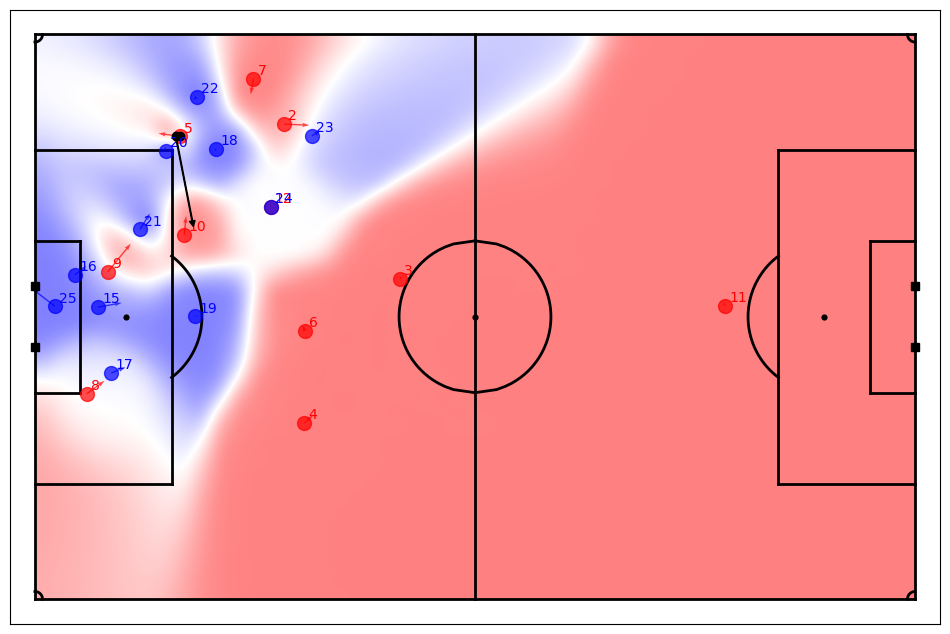

In [35]:
# evaluated pitch control surface for first pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    1111,
    events,
    tracking_home,
    tracking_away,
    params,
    GK_numbers,
    field_dimen=(
        106.0,
        68.0,
    ),
    n_grid_cells_x=50,
)
mviz.plot_pitchcontrol_for_event(
    1111, events, tracking_home, tracking_away, PPCF, annotate=True
)
plt.savefig('pitchcontrol_pass_1.jpg')

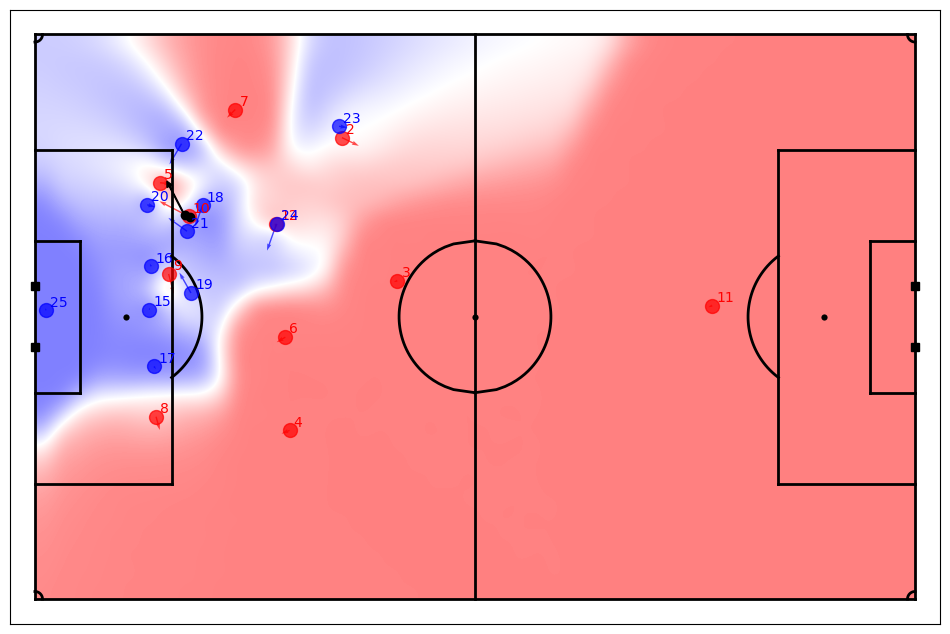

In [34]:
# evaluated pitch control surface for second pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    1112,
    events,
    tracking_home,
    tracking_away,
    params,
    GK_numbers,
    field_dimen=(
        106.0,
        68.0,
    ),
    n_grid_cells_x=50,
)
mviz.plot_pitchcontrol_for_event(
    1112, events, tracking_home, tracking_away, PPCF, annotate=True
)
plt.savefig('pitchcontrol_pass_2.jpg')

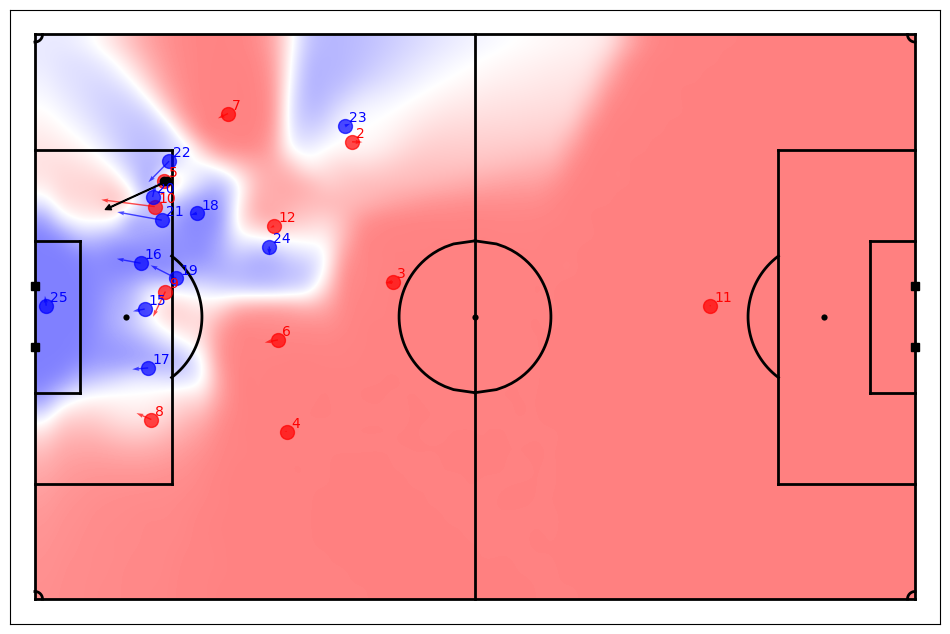

In [36]:
# evaluated pitch control surface for third pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    1113,
    events,
    tracking_home,
    tracking_away,
    params,
    GK_numbers,
    field_dimen=(
        106.0,
        68.0,
    ),
    n_grid_cells_x=50,
)

mviz.plot_pitchcontrol_for_event(
    1113, events, tracking_home, tracking_away, PPCF, annotate=True
)
plt.savefig('pitchcontrol_pass_3.jpg')

In [38]:
# get all home passes
home_passes = events[(events["Type"].isin(["PASS"])) & (events["Team"] == "Home")]
# list for storing pass probablities
pass_success_probability = []

for i, row in home_passes.iterrows():
    pass_start_pos = np.array([row["Start X"], row["Start Y"]])
    pass_target_pos = np.array([row["End X"], row["End Y"]])
    pass_frame = row["Start Frame"]

    attacking_players = mpc.initialise_players(
        tracking_home.loc[pass_frame], "Home", params, GK_numbers[0]
    )
    defending_players = mpc.initialise_players(
        tracking_away.loc[pass_frame], "Away", params, GK_numbers[1]
    )
    Patt, Pdef = mpc.calculate_pitch_control_at_target(
        pass_target_pos, attacking_players, defending_players, pass_start_pos, params
    )

    pass_success_probability.append((i, Patt))

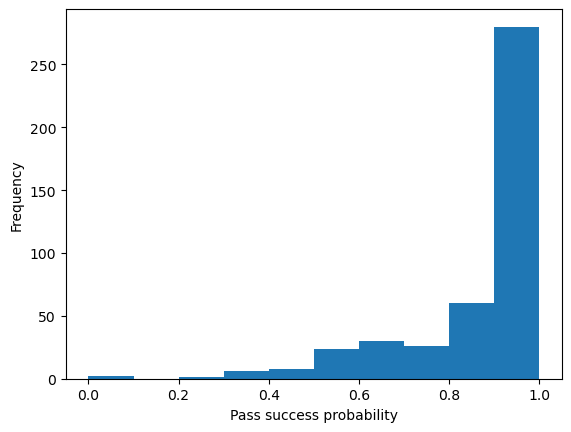

In [39]:
fig, ax = plt.subplots()
ax.hist([p[1] for p in pass_success_probability], np.arange(0, 1.1, 0.1))
ax.set_xlabel("Pass success probability")
ax.set_ylabel("Frequency")
plt.savefig('pass_success_probability.jpg')

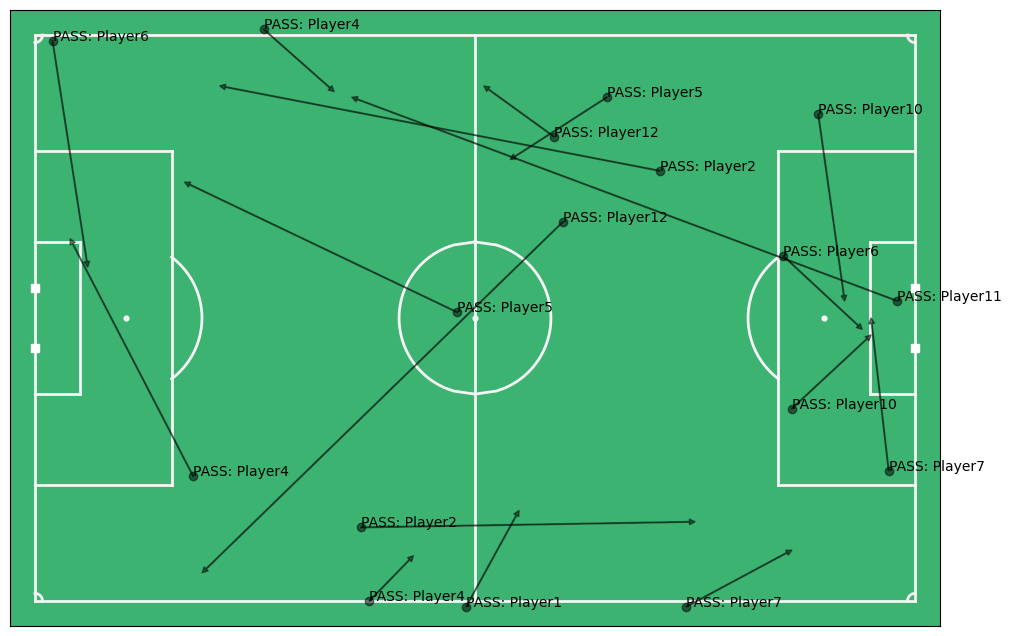

In [40]:
# sort the passes by pitch control probability
pass_success_probability = sorted(pass_success_probability, key=lambda x: x[1])
# identify the events corresponding to the most risky passes (pitch control < 0.5)
risky_passes = events.loc[[p[0] for p in pass_success_probability if p[1] < 0.5]]
# plot the risky passes
mviz.plot_events(risky_passes, color="k", indicators=["Marker", "Arrow"], annotate=True)
plt.savefig('risky_passes.jpg')

In [41]:
# Print events that followed those risky passes
print("Event following a risky (completed) pass")
for p in pass_success_probability[:20]:
    outcome = events.loc[p[0] + 1].Type
    print(p[1], outcome)

Event following a risky (completed) pass
0.0597114090191567 BALL LOST
0.08168200787370786 PASS
0.26815875535020706 CHALLENGE
0.33516741193115557 PASS
0.3469926626736874 SHOT
0.3612404989802527 SHOT
0.3709885317987774 SHOT
0.37118485810362484 BALL LOST
0.38246026505091757 CHALLENGE
0.4371054451603015 CHALLENGE
0.43877288629307143 CHALLENGE
0.44294551435519824 SHOT
0.44715966107884275 CHALLENGE
0.4475269483868594 BALL OUT
0.44918373827296565 BALL LOST
0.4718753003120619 CHALLENGE
0.48409635687898456 PASS
0.5020059547496684 PASS
0.5079398752563166 BALL LOST
0.5135958506155978 CHALLENGE
